<a href="https://colab.research.google.com/github/andreacangiani/NSPDE-ANA22/blob/main/python/C4-FD2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite Difference in 2D

1. Finite Difference solver for the 2D Poisson problem:

$-\Delta u=f \quad \in \Omega=(a,b)^2$

$u|_{\partial\Omega}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

Function computing the 2D FD algebric system

In [2]:
def FD2D(omega,N,rhs):
  # FD system matrix and rhs in omega^2 for
  # diffusion-advection-reaction problem with coeffs
  # alpha,beta,gamma,rhs
  # homogeneous Dirichlet bc
  # uniform grid in sparse CSR format
  # with Nx = Ny = N

  # grid
  h = (omega[1]-omega[0])/N
  x = np.linspace(omega[0],omega[1],N+1)
  y = x

  X, Y = np.meshgrid(x, y)
  X = X.flatten() 
  Y = Y.flatten()

  # compute rhs
  F = rhs(X,Y)
  
  # compute system matrix
  coefs = [-np.ones((N+1)*N), -np.ones((N+1)*(N+1)-1), 4*np.ones((N+1)*(N+1)), -np.ones((N+1)*(N+1)-1), -np.ones((N+1)*N)]
  A = sp.diags(coefs,[-(N+1), -1, 0 ,1, N+1],format="lil")

  # Implement boundary conditions
  for i in range(N+1) :
    A[i,A[i].nonzero()] = 0; A[i,i] = 1; F[i] = 0
    j = (N+1) * N + i
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  for i in range(1,N) :
    j = i * (N+1)
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0
    j = i * (N+1) + N
    A[j,A[j].nonzero()] = 0; A[j,j] = 1; F[j] = 0

  return (1./h**2) * A, F

Define FD problem and solve

In [3]:
omega = [0,np.pi]
N = 10
rhs = lambda x, y : 2 * np.sin(x) * np.sin(y)
exact = lambda x, y : np.sin(x) * np.sin(y)

# call function computing FD system
A, F = FD2D(omega,N,rhs)

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)


Plot solution

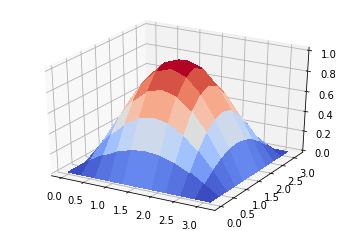

In [4]:
# Prepare data for plotting 
x = np.linspace(omega[0],omega[1],N+1)
y = x
X, Y = np.meshgrid(x, y)
Uh = Uh.reshape((N+1),(N+1))

# Plot the solution
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Uh, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

Compute discrete max norm error

In [9]:
# compute exact sol
U = exact(X,Y)

# Print discrete error
print(np.max(np.max(np.abs(U-Uh))))

0.008265416966228845


**Exercise 1**: Compute error and EOC

**Exercise 2**: Generalise to more general elliptic problems (PDE and boundary conditions